## Modelos de Predicción Analítica


### Dataset: https://www.kaggle.com/datasets/leilaaliha/ecommerce-customers/data

1. Recopilación y Exploración de Datos:

In [1]:
#import Lib
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.express as px
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.model_selection import cross_val_score
from sklearn.metrics import roc_curve, roc_auc_score
import warnings
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv('Ecommerce Customers.csv')

In [3]:
data.head()

,Email,Address,Avatar,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
0,mstephenson@fernandez.com,"835 Frank Tunnel\nWrightmouth, MI 82180-9605",Violet,34.497268,12.655651,39.577668,4.082621,587.951054
1,hduke@hotmail.com,"4547 Archer Common\nDiazchester, CA 06566-8576",DarkGreen,31.926272,11.109461,37.268959,2.664034,392.204933
2,pallen@yahoo.com,"24645 Valerie Unions Suite 582\nCobbborough, D...",Bisque,33.000915,11.330278,37.110597,4.104543,487.547505
3,riverarebecca@gmail.com,"1414 David Throughway\nPort Jason, OH 22070-1220",SaddleBrown,34.305557,13.717514,36.721283,3.120179,581.852344
4,mstephens@davidson-herman.com,"14023 Rodriguez Passage\nPort Jacobville, PR 3...",MediumAquaMarine,33.330673,12.795189,37.536653,4.446308,599.406092


In [4]:
data.tail()

,Email,Address,Avatar,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
495,lewisjessica@craig-evans.com,"4483 Jones Motorway Suite 872\nLake Jamiefurt,...",Tan,33.237660,13.566160,36.417985,3.746573,573.847438
496,katrina56@gmail.com,"172 Owen Divide Suite 497\nWest Richard, CA 19320",PaleVioletRed,34.702529,11.695736,37.190268,3.576526,529.049004
497,dale88@hotmail.com,"0787 Andrews Ranch Apt. 633\nSouth Chadburgh, ...",Cornsilk,32.646777,11.499409,38.332576,4.958264,551.620145
498,cwilson@hotmail.com,"680 Jennifer Lodge Apt. 808\nBrendachester, TX...",Teal,33.322501,12.391423,36.840086,2.336485,456.469510
499,hannahwilson@davidson.com,49791 Rachel Heights Apt. 898\nEast Drewboroug...,DarkMagenta,33.715981,12.418808,35.771016,2.735160,497.778642



## 2. Análisis y Preprocesamiento de Datos:

In [5]:
# Cuenta cuántos usuarios tienen la aplicación
users_without_website = len(data[data['Time on Website'] == 0])
users_with_website = len(data[data['Time on Website'] > 0])

print(f"Usuarios con la aplicación: {users_without_website}")
print(f"Usuarios sin la aplicación: {users_with_website}")

Usuarios con la aplicación: 0
Usuarios sin la aplicación: 500


In [6]:
users_without_app = len(data[data['Time on App'] == 0])
users_with_app = len(data[data['Time on App'] > 0])

print(f"Usuarios que usan la web: {users_with_app}")
print(f"Usuarios que no usan la web: {users_without_app}")

Usuarios que usan la web: 500
Usuarios que no usan la web: 0


In [7]:
data.describe()

,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
count,500.000000,500.000000,500.000000,500.000000,500.000000
mean,33.053194,12.052488,37.060445,3.533462,499.314038
std,0.992563,0.994216,1.010489,0.999278,79.314782
min,29.532429,8.508152,33.913847,0.269901,256.670582
25%,32.341822,11.388153,36.349257,2.930450,445.038277
50%,33.082008,11.983231,37.069367,3.533975,498.887875
75%,33.711985,12.753850,37.716432,4.126502,549.313828
max,36.139662,15.126994,40.005182,6.922689,765.518462


1. Email: Esta columna contiene las direcciones de correo electrónico de los clientes. Puede servir como identificador único para cada cliente.

2. Address: Esta columna contiene la dirección física o la ubicación de los clientes. Puede ser útil para segmentar a los clientes por ubicación geográfica.

3. Avatar: Esta columna contiene información sobre los avatares. No está claro cuál sería su utilidad en un análisis de datos.

4. Avg. Session Length: Esta columna contiene la duración promedio de las sesiones de los clientes en un sitio web o la aplicación.

5. Time on App: Esta columna representa la cantidad de tiempo que los clientes pasan en la aplicación móvil.

6. Time on Website: Esta columna representa la cantidad de tiempo que los clientes pasan en el sitio web. Al comparar los dos tiempos, 'Time on App' y 'Time on Website', se observa que el promedio mayor se encuentra en 'Time on Website'. Esto sugiere que podría ser donde se generen mayores ingresos. Se recomienda realizar un análisis más detallado. Todos los usuarios navegan en la página web y también tienen la aplicación.

7. Length of Membership: Esta columna contiene la cantidad de tiempo de la membresía en años de un cliente. Puede ser una métrica importante para evaluar la lealtad de los clientes.

8. Yearly Amount Spent: Esta columna contiene la cantidad de dinero gastada anualmente por cada cliente. Es una métrica clave en el análisis de clientes y ventas. Esta métrica permitiría realizar una regresión lineal abstrayendo los otros datos.
    

In [8]:
data.isnull().sum()

Email                   0
Address                 0
Avatar                  0
Avg. Session Length     0
Time on App             0
Time on Website         0
Length of Membership    0
Yearly Amount Spent     0
dtype: int64

No se encontraron datos null en la base de datos

In [9]:
df = pd.DataFrame(data=data)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Email                 500 non-null    object 
 1   Address               500 non-null    object 
 2   Avatar                500 non-null    object 
 3   Avg. Session Length   500 non-null    float64
 4   Time on App           500 non-null    float64
 5   Time on Website       500 non-null    float64
 6   Length of Membership  500 non-null    float64
 7   Yearly Amount Spent   500 non-null    float64
dtypes: float64(5), object(3)
memory usage: 31.4+ KB


Text(0.5, 1.0, 'Distribucion: Yearly Amount Spent')

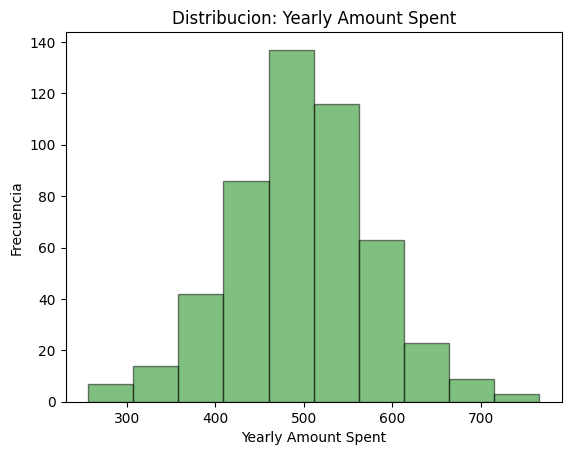

In [10]:
plt.hist(data['Yearly Amount Spent'], color = 'green', alpha = 0.5, edgecolor = 'black')
plt.xlabel("Yearly Amount Spent")
plt.ylabel("Frecuencia")
plt.title("Distribucion: Yearly Amount Spent")


Tener una distribución lineal en la posible variable a predecir ofrece varios beneficios:

1. Fortalece la validez de las pruebas estadísticas y la inferencia que se puede realizar sobre los coeficientes del modelo, ya que las pruebas estadísticas están más fundamentadas en datos normalmente distribuidos.
2. Produce predicciones menos sesgadas y más eficientes, lo que significa que el modelo puede proporcionar estimaciones más precisas de los valores de la variable de respuesta.
3. Respaldar la construcción de intervalos de confianza precisos para los coeficientes del modelo, lo que permite una mayor confianza en las estimaciones de los parámetros del modelo.
4. Es conveniente para aplicar regresión lineal. Una distribución normal en la variable de respuesta significa que el modelo no requiere suposiciones no lineales complicadas como en otros tipos de modelos, lo que simplifica su interpretación y aplicación.

Text(0, 0.5, 'Yearly Amount Spent')

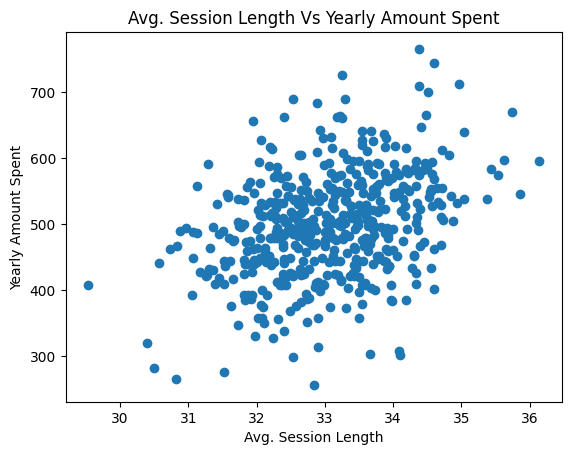

In [11]:
plt.scatter(data['Avg. Session Length'], data['Yearly Amount Spent'])
plt.title('Avg. Session Length Vs Yearly Amount Spent')
plt.xlabel('Avg. Session Length')
plt.ylabel('Yearly Amount Spent')

Text(0, 0.5, 'Yearly Amount Spent')

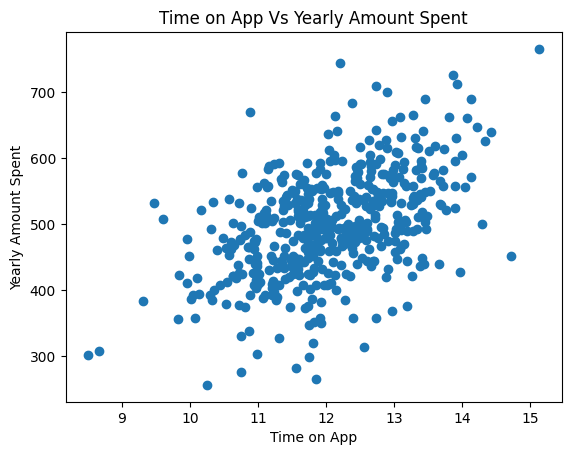

In [12]:
plt.scatter(data['Time on App'], data['Yearly Amount Spent'])
plt.title('Time on App Vs Yearly Amount Spent')
plt.xlabel('Time on App')
plt.ylabel('Yearly Amount Spent')

Text(0, 0.5, 'Yearly Amount Spent')

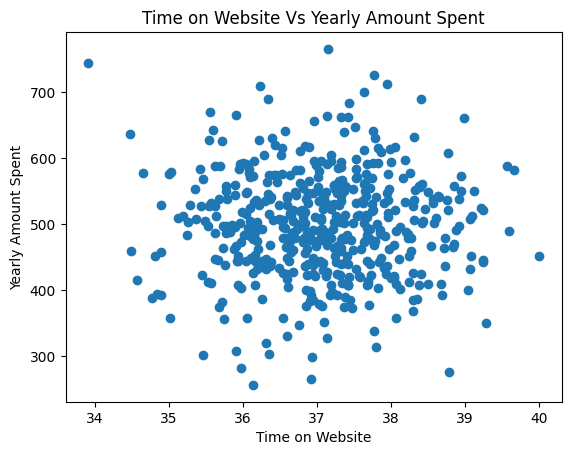

In [13]:
plt.scatter(data['Time on Website'], data['Yearly Amount Spent'])
plt.title('Time on Website Vs Yearly Amount Spent')
plt.xlabel('Time on Website')
plt.ylabel('Yearly Amount Spent')

Text(0, 0.5, 'Yearly Amount Spent')

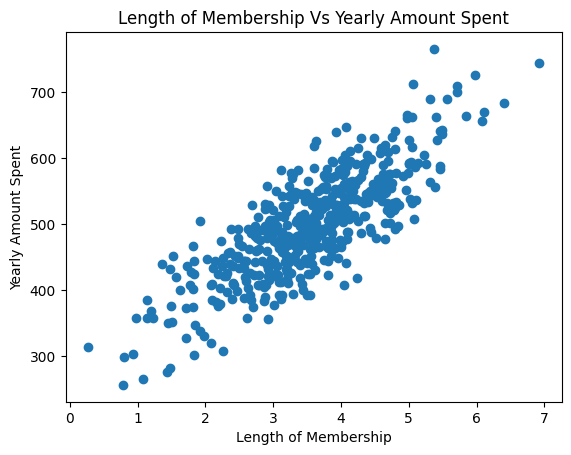

In [14]:
#Length of Membership
plt.scatter(data['Length of Membership'], data['Yearly Amount Spent'])
plt.title('Length of Membership Vs Yearly Amount Spent')
plt.xlabel('Length of Membership')
plt.ylabel('Yearly Amount Spent')

Analisis de tablas 


## 3 Dispersión de la variables con respecto a 'Yearly Amount Spent'

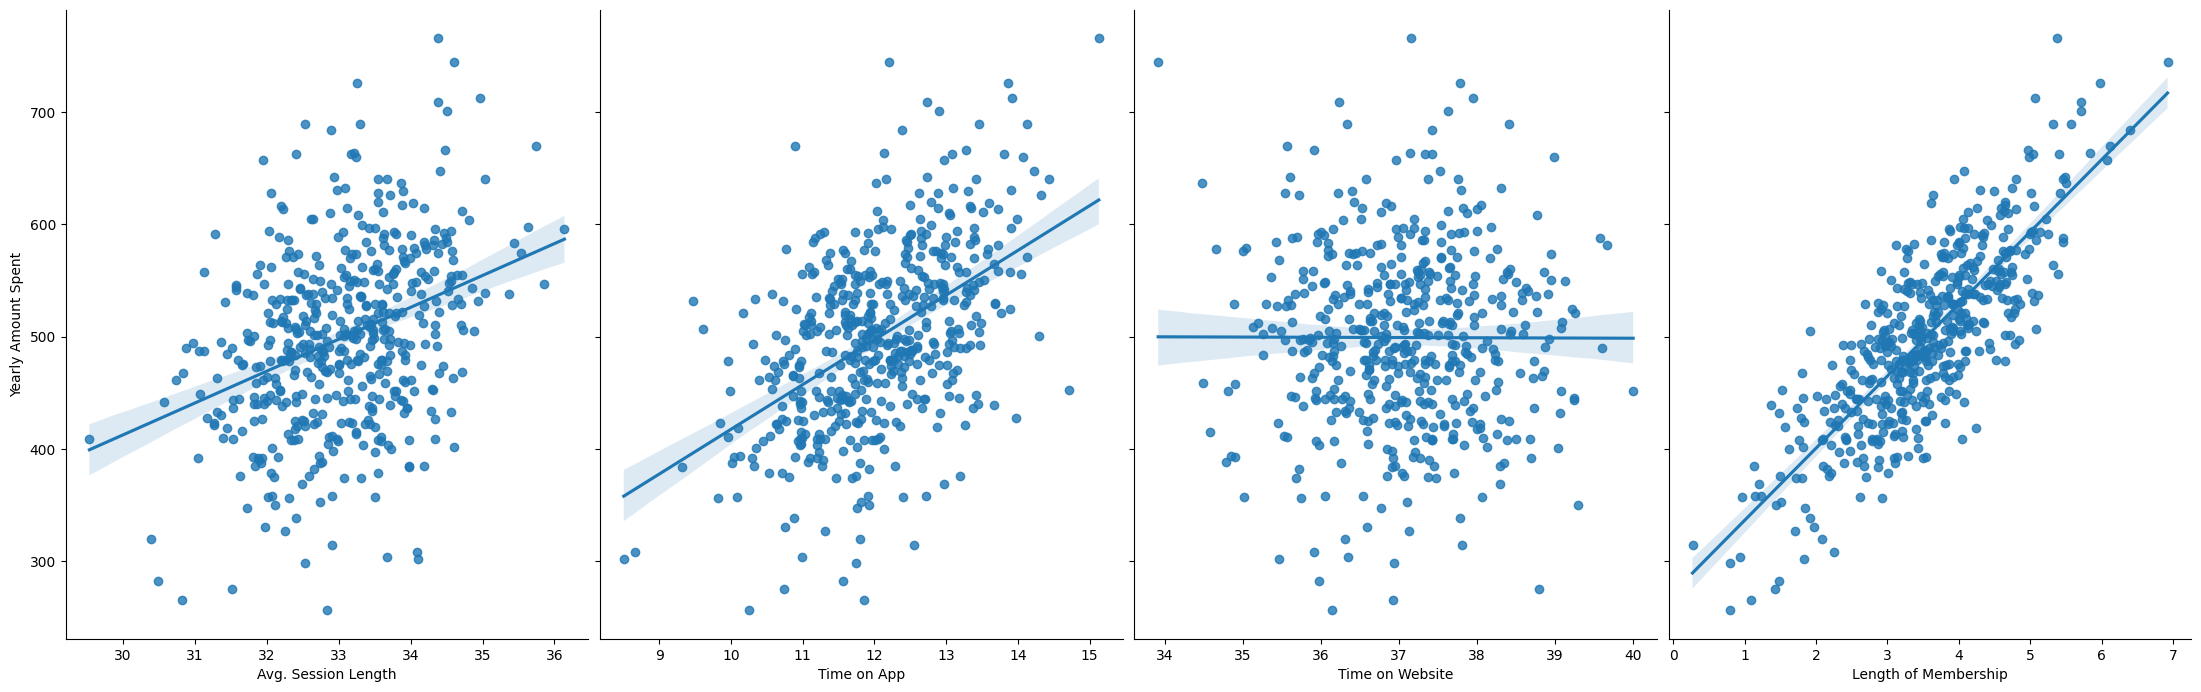

In [15]:
sns.pairplot(data, x_vars=['Avg. Session Length', 'Time on App','Time on Website', 'Length of Membership'], y_vars='Yearly Amount Spent', size=7, aspect=0.8,kind = 'reg')
plt.show()

1. Yearly amount Spendt vs AVG. Session Length
    - Se observa una leve pendiente, dando a entender los usuarios en promedio de 32 a 34 son los que mas tienden a realizar compras 
2. Yearly amount Spendt vs AVG. Time on App
    - Si bien las ventas en App no son comparado al sitio web, observando el tiempo promedio que un usuario esta en la app, estos pasan muchos menos tiempo comprado a los de Website, realizando compras mas rapidas o puntuales. 
    - Podria significar que son usuarios recurrentes.
    - Prodria significar que la App esta mejor estructurada para realizar compras
3. Yearly amount Spendt vs AVG. Time on Website
    - La pentiende es casi cero, por lo cual no hay una relación directa entre el tiempo y las ventas. Esto sugiere que son usuarios que no van a comprar cosas puntuales sino, navegan en buscar de productos que les pueda interesar.
4. Yearly amount Spendt vs AVG. Leght of Membership
    - Existe una alta relacion entre la venta anual y los usuarios con mayor tiempo de membresia.


In [16]:
data_corr = data[['Avg. Session Length', 'Time on App','Time on Website', 'Length of Membership','Yearly Amount Spent']]

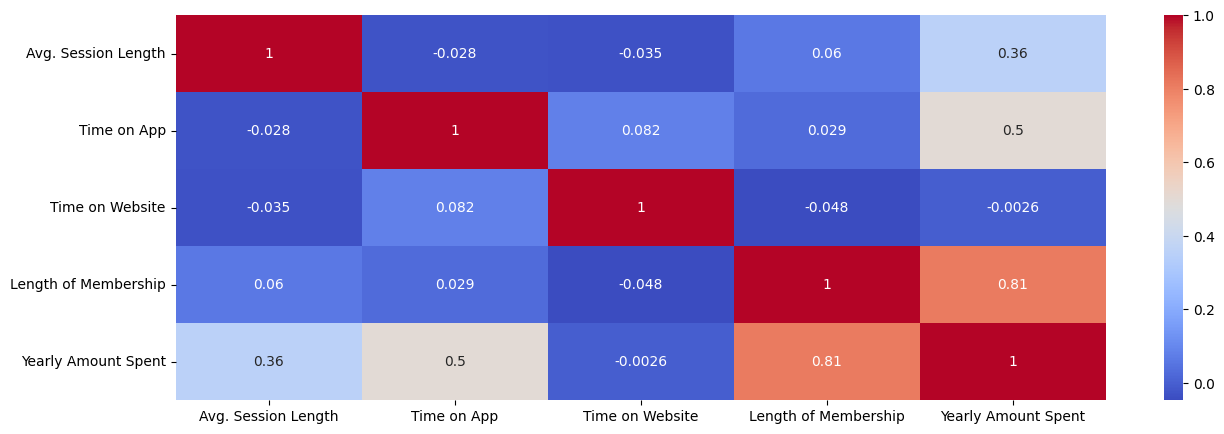

In [17]:
plt.figure(figsize= (15, 5))
sns.heatmap(data_corr.corr(), annot=True, cmap='coolwarm')
plt.show()

## 4. Regresión Lineal:

### Definicion de Variables 
* Avg. Session Length: Sesión promedio de sesiones de consejos de estilo en la tienda.
* Time on App: tiempo promedio de permanencia en la aplicación
* Time on Website: Tiempo promedio de permanencia en el Sitio Web
* Length of Membership: cuántos años el cliente ha sido miembro


* Yearly Amount Spent: Cantidad anual gastada

In [18]:
y = df['Yearly Amount Spent']
x = df[['Avg. Session Length', 'Time on App','Time on Website', 'Length of Membership']]
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.4, random_state=1)

In [19]:
print(f"x_train size: {len(x_train)} , x_text: {len(x_test)} ")

x_train size: 300 , x_text: 200 


In [20]:
model = LinearRegression()
model.fit(x_train,y_train)
B0_intercept = model.intercept_
Bi_coef = model.coef_
print("B0_intercept: ", B0_intercept)
print("Bi_coef: ", Bi_coef)


B0_intercept:  -1049.784727508768
Bi_coef:  [2.60891361e+01 3.90264696e+01 6.33046136e-03 6.12929297e+01]


## Formula regresion multiple lineal
$Y(X_1,X_2,X_3,X_4)= B_0 + B_1 \cdot X_1 + B_2 \cdot X_2 + B_3 \cdot X_3+ B_4 \cdot X_4$

In [21]:
def funcionLineal(x1, x2, x3, x4, B0, B1, B2, B3, B4):
    return B0 + x1*B1 + x2*B2 + x3*B3 + x4*B4

## Predicción de datos de prueba

31.366212167187687
[499.2701117009442, 519.8247243832946, 563.2670076698726, 479.02483380633214, 423.93121862492734, 509.3019564524727, 478.94041869027785, 460.3690230739938, 519.6464452629793, 438.9142409125833, 487.60442675974826, 526.5913131525774, 577.4700354316076, 554.1873254535711, 685.7292339410221, 472.9514153330937, 314.9145774932976, 458.56402394852154, 452.3474931513191, 460.88112786898307, 456.9795618327404, 331.7290388813388, 504.794817912067, 401.70372493377613, 767.2068424690183, 424.9014495891656, 513.5694301080474, 476.86822920783186, 306.7224239759226, 590.7137300295919, 505.19051186626984, 390.0482219075328, 463.26214233802216, 316.0100010382685, 465.63003976258506, 550.4131756862004, 619.8919763500069, 591.8996492067592, 496.02538683119576, 401.6943918885262, 506.4609085310331, 547.2628856963458, 423.47506899317636, 559.9419262939094, 441.07161252146904, 433.4994976413806, 430.0065506460641, 506.7613234807748, 426.15237978452797, 401.784656929551, 552.8370485767978

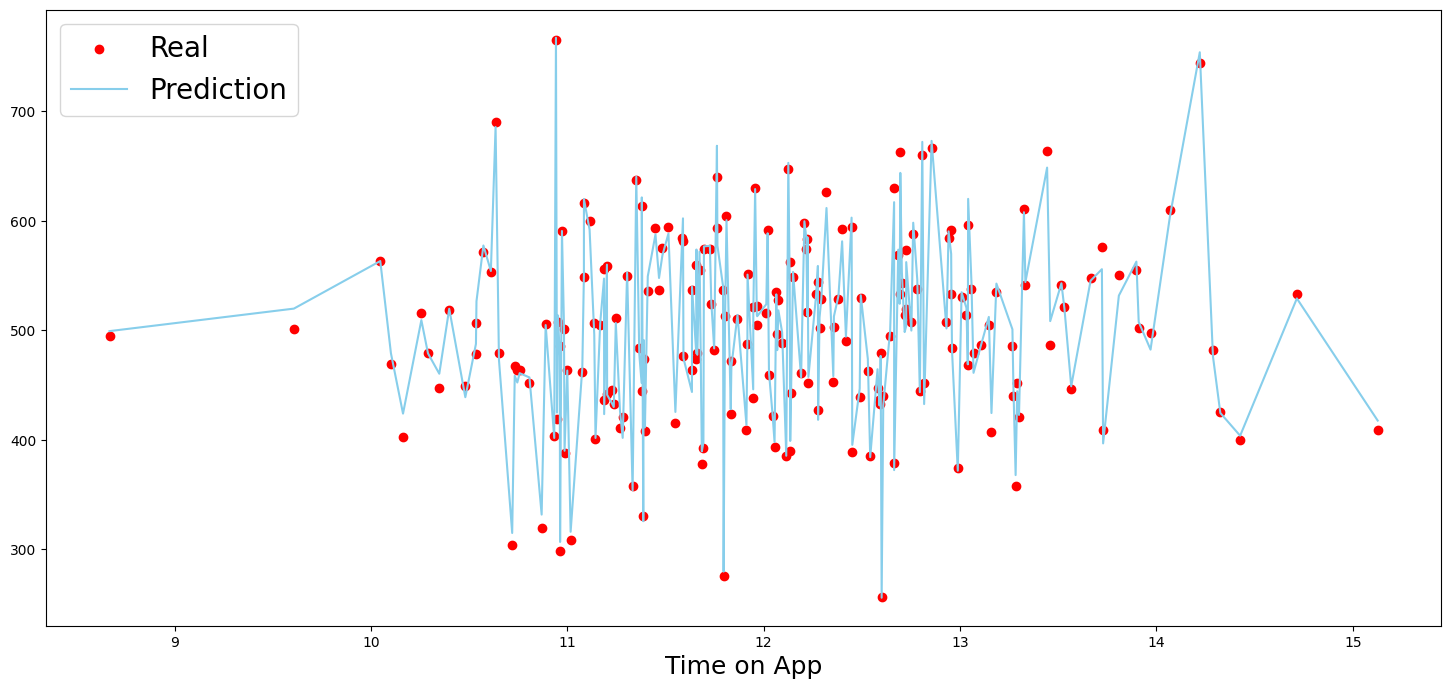

In [22]:

columna_parametros = ['Avg. Session Length', 'Time on App','Time on Website', 'Length of Membership'] 
y_model = []
len(x_train)
print(x_train.iloc[0][columna_parametros[0]])
for i in range(0, len(x_test)):    
    y_model.append(funcionLineal(x_test.iloc[i][columna_parametros[0]],
                             x_test.iloc[i][columna_parametros[1]], 
                             x_test.iloc[i][columna_parametros[2]], 
                             x_test.iloc[i][columna_parametros[3]],
                             B0_intercept, Bi_coef[0], Bi_coef[1],Bi_coef[2], Bi_coef[3]))                                 
print(y_model)
x_test_sort_by_time_on_app = x_test.sort_values(by='Time on App')
plt.figure(figsize=(18, 8))
plt.scatter(x_test_sort_by_time_on_app['Time on App'], y_test , color = 'red', label = 'Real')
plt.plot(x_test_sort_by_time_on_app['Time on App'], y_model, color = 'skyblue', label = 'Prediction')
plt.xlabel('Time on App', fontsize = 18)
plt.legend(fontsize = 20)
plt.show()


In [23]:
y_pred = model.predict(x_test)

In [24]:
x_test.insert(0, 'y_test', y_test)
x_test.insert(0, 'y_pred', y_pred)

In [25]:
x_test

,y_pred,y_test,Avg. Session Length,Time on App,Time on Website,Length of Membership
304,499.270112,494.687156,33.914015,12.266504,36.575031,3.023474
340,519.824724,501.122492,31.816428,14.288015,36.773861,2.964498
47,563.267008,563.672873,32.726785,12.988510,36.462003,4.113226
67,479.024834,469.310861,32.805220,11.835476,36.375066,3.439591
479,423.931219,402.167122,34.606242,11.761884,38.126520,1.820811
...,...,...,...,...,...,...
364,476.264496,482.144997,32.602739,11.764448,37.922704,3.525806
186,424.515302,425.745092,32.484260,10.933252,36.545506,3.261325
267,403.742644,399.983872,33.732648,12.138794,36.853882,1.623420
230,529.108695,532.935219,32.351478,13.105159,35.574842,3.641497


# Evaluación de la precisión del modelo

In [26]:
print('Mean Absolute Error (MAE):', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error (MAE):', metrics.mean_squared_error(y_test, y_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('---')
print('Intercept = ' , model.intercept_)
print('Coefficient : ' , model.coef_)
print()
print('R2 Score = ' , metrics.r2_score(y_test,y_pred))

Mean Absolute Error (MAE): 7.490212595487322
Mean Squared Error (MAE): 89.58380731155462
RMSE: 9.464872281840607
---
Intercept =  -1049.784727508768
Coefficient :  [2.60891361e+01 3.90264696e+01 6.33046136e-03 6.12929297e+01]

R2 Score =  0.987032307056989


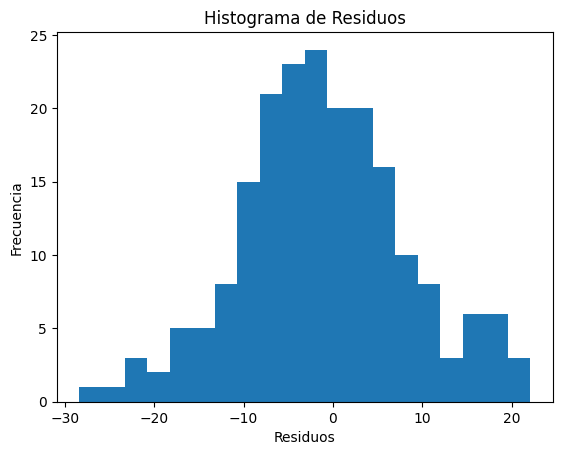

In [27]:
residuals = y_test - y_pred
plt.hist(residuals, bins=20)
plt.xlabel("Residuos")
plt.ylabel("Frecuencia")
plt.title("Histograma de Residuos")
plt.show()

Se observar una distribucion normal, lo que implica que los residuos están dispersos de manera aleatoria alrededor de cero y no muestran ningún patrón evidente, lo que es consistente con una de las suposiciones clave de la regresión lineal.